<a href="https://colab.research.google.com/github/hargurjeet/Suprise_Housing/blob/main/Suprise_Housing_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suprise House Pricing Case Study**

The case study provide a detailed analysis of housing prices within Australia and how Suprise Housing company leverage this information to buy houses at low prices and sell them at high prices

  # **Table Of Contents**<a name="top"></a>


---



---

  
  1. [About the Dataset](#1)
  2. [Data Understanding](#2)
  3. [Expainatory Data Analysis](#3)
  4. [Data Prepartion](#4)
  5. [Model Building](#5)
  6. [Evaluation on Test set](#6)
  7. [Summary & Conclusion](#7)
  8. [References](#8)

# 5: Model Building <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 6: Evaluations <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 7: Summary & Conclusion <a name="7"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 8: Reference <a name="8"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# 1: AboutDataset <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

The dataset contains around 1500 records covering various details of house prices along with it sales/house pricing information.

In [161]:
## Data preprocessing libraries
import pandas as pd
import numpy as np
from numpy import arange

## Libraries for building visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Libraries for building ML models
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Libraries for Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Libraries for hyperparameter tuning
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# Libraries to supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [162]:
input_url = 'https://raw.githubusercontent.com/hargurjeet/Suprise_Housing/main/train.csv'
raw_data = pd.read_csv(input_url)
raw_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# 2: Data Understanding <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [163]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Key observation** - 
- No nul values within the dataset. Few columns seems to have extermely high number of null values.
- High number of both Categorical and numberica columns.

# 3: Explainatory Data Analysis <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [164]:
# Identifying and removing columns having missing values over 40%
pd.set_option('display.max_rows', None)
columns_with_high_missing_values = raw_data.columns[[((raw_data.isnull().sum()/len(raw_data))*100 > 40)]]
columns_with_high_missing_values

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [165]:
print('Total number of columns within the dataset', len(raw_data.columns))
raw_data = raw_data.drop(labels=columns_with_high_missing_values, axis=1)

# Id colums seems to be irrelevant as well
raw_data = raw_data.drop(labels='Id', axis=1)
print('Total number of columns left after dropping the columns', len(raw_data.columns))

Total number of columns within the dataset 81
Total number of columns left after dropping the columns 75


In [166]:
# As total number of columns are pretty high
# let us identify the numberical and categorical columns
raw_data_numberic = raw_data.select_dtypes(include=['number'])
raw_data_cat = raw_data.select_dtypes(include=['object'])
print('Total numberic columns', len(raw_data_numberic.columns))
print('Total categorical columns', len(raw_data_cat.columns))

Total numberic columns 37
Total categorical columns 38


In [167]:
# Analysing Numberical columns
raw_data_numberic.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

## Univarite Analysis

### Univarite analysis Quantitavie **variables**

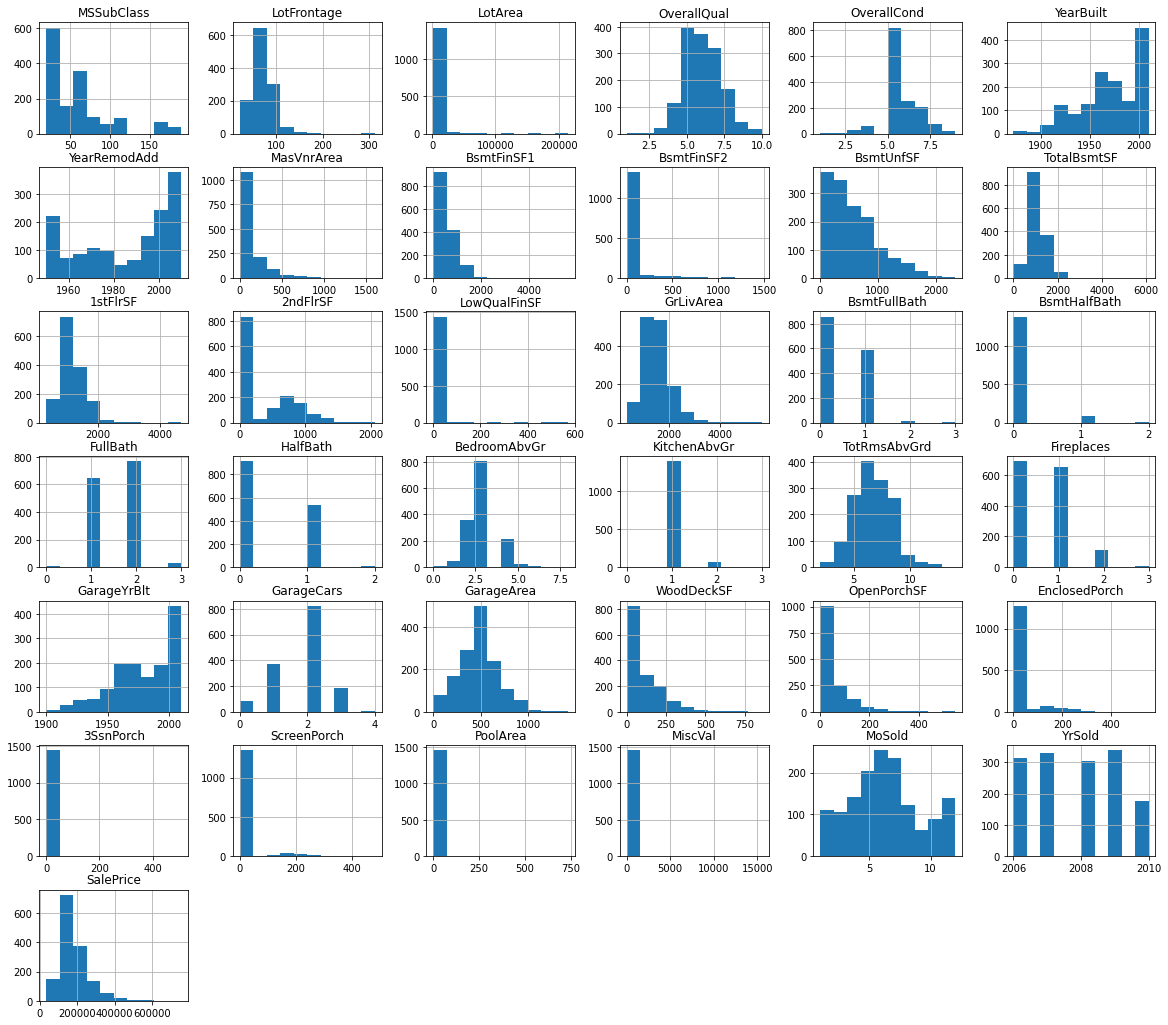

In [168]:
raw_data_numberic.hist(figsize=(20,18))
plt.show()

** - Key obervations **
- For few columns most of the values seems zero. They are  'BsmtFinSF2', 'LowQualFinSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal'. As these columns doesnt contain much info I plan to drop these columns

- Few columns can be categorised as catergory columns as they done contain continous values they are - 'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'KitchenAbvGr','Fireplaces', 'GarageCars','YrSold'

In [169]:
# adding colums to categorical data
cat_cols =['BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'KitchenAbvGr','Fireplaces', 'GarageCars','YrSold']
raw_data_cat = pd.concat([raw_data_cat,raw_data_numberic[cat_cols]], axis=1 )
# changing the datatype to object as they are not maintained as categorical data
raw_data_cat[cat_cols] = raw_data_cat[cat_cols].astype(object)

# Implementing the above observations
drop_cols =['BsmtFinSF2', 'LowQualFinSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal']
raw_data_numberic.drop(columns = drop_cols + cat_cols, inplace=True)

In [170]:
print('Total numberic columns', len(raw_data_numberic.columns))
print('Total categorical columns', len(raw_data_cat.columns))

Total numberic columns 22
Total categorical columns 46


### Univarite analysis Categorical variables

In [171]:
raw_data_cat.shape

(1460, 46)

In [172]:
raw_data_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'YrSold'],
      dtype='object')

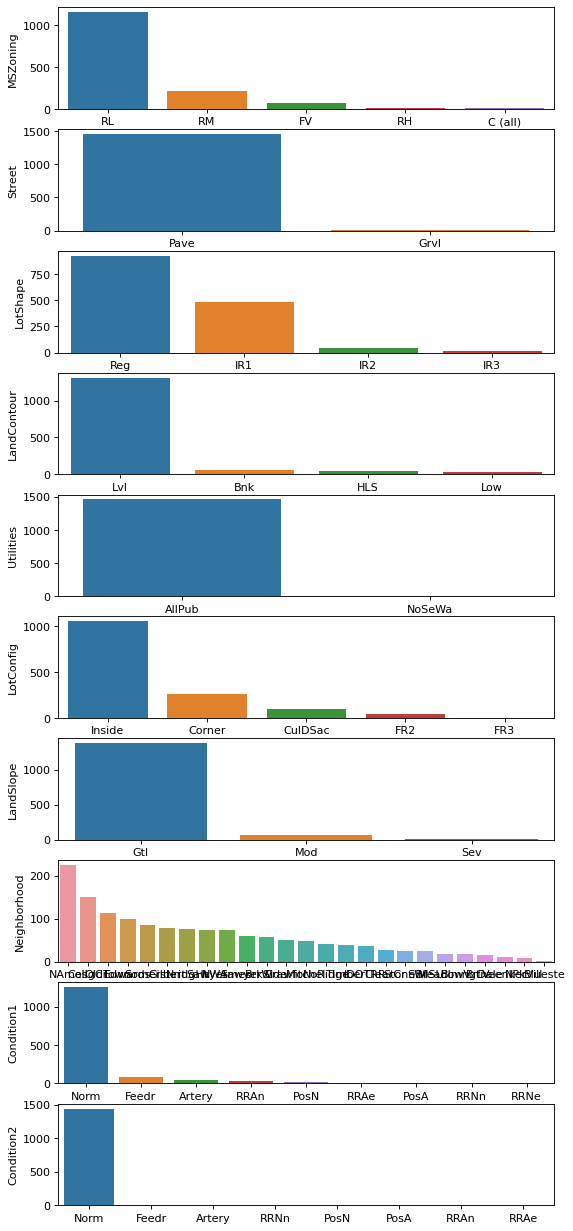

In [173]:
figure(figsize=(8, 40), dpi=80)
# plt.figure(bbox_inches='tight',dpi=100)

# fig, axs = plt.subplots(2, 2) 
plt.subplot(20, 1, 1)
sns.barplot(x = raw_data_cat.MSZoning.value_counts().index, y = raw_data_cat.MSZoning.value_counts())

plt.subplot(20, 1, 2)
sns.barplot(x = raw_data_cat.Street.value_counts().index, y = raw_data_cat.Street.value_counts())

plt.subplot(20, 1, 3)
sns.barplot(x = raw_data_cat.LotShape.value_counts().index, y = raw_data_cat.LotShape.value_counts())

plt.subplot(20, 1, 4)
sns.barplot(x = raw_data_cat.LandContour.value_counts().index, y = raw_data_cat.LandContour.value_counts())

plt.subplot(20, 1, 5)
sns.barplot(x = raw_data_cat.Utilities.value_counts().index, y = raw_data_cat.Utilities.value_counts())

plt.subplot(20, 1, 6)
sns.barplot(x = raw_data_cat.LotConfig.value_counts().index, y = raw_data_cat.LotConfig.value_counts())

plt.subplot(20, 1, 7)
sns.barplot(x = raw_data_cat.LandSlope.value_counts().index, y = raw_data_cat.LandSlope.value_counts())

plt.subplot(20, 1, 8)
sns.barplot(x = raw_data_cat.Neighborhood.value_counts().index, y = raw_data_cat.Neighborhood.value_counts())

plt.subplot(20, 1, 9)
sns.barplot(x = raw_data_cat.Condition1.value_counts().index, y = raw_data_cat.Condition1.value_counts())

plt.subplot(20, 1, 10)
sns.barplot(x = raw_data_cat.Condition2.value_counts().index, y = raw_data_cat.Condition2.value_counts())
plt.show()



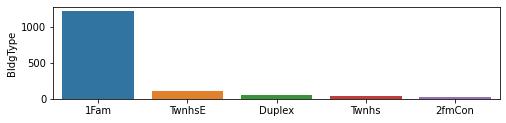

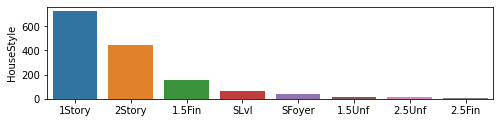

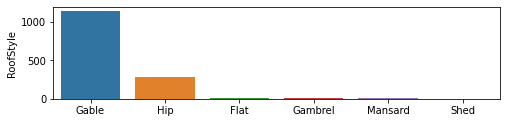

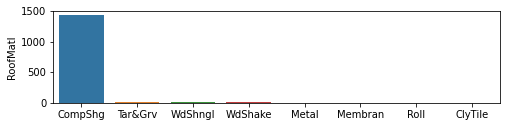

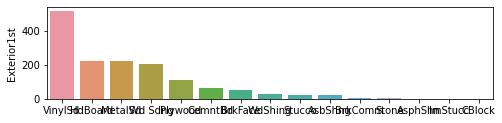

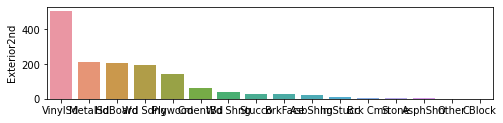

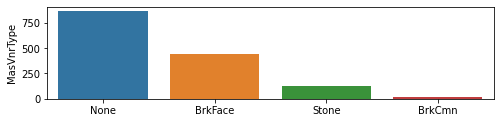

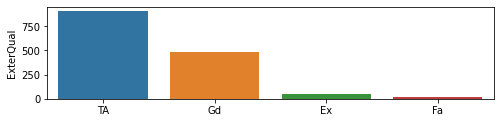

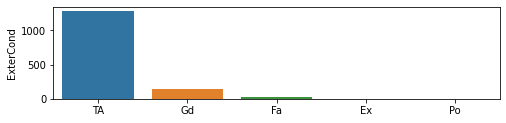

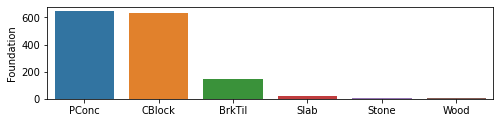

In [174]:
# figure(figsize=(8, 40), dpi=80)
plt.rcParams["figure.figsize"] = (8,20)
plt.subplot(10, 1, 1)
sns.barplot(x = raw_data_cat.BldgType.value_counts().index, y = raw_data_cat.BldgType.value_counts())
plt.show()

plt.subplot(10, 1, 2)
sns.barplot(x = raw_data_cat.HouseStyle.value_counts().index, y = raw_data_cat.HouseStyle.value_counts())
plt.show()

plt.subplot(10, 1, 3)
sns.barplot(x = raw_data_cat.RoofStyle.value_counts().index, y = raw_data_cat.RoofStyle.value_counts())
plt.show()

plt.subplot(10, 1, 4)
sns.barplot(x = raw_data_cat.RoofMatl.value_counts().index, y = raw_data_cat.RoofMatl.value_counts())
plt.show()

plt.subplot(10, 1, 5)
sns.barplot(x = raw_data_cat.Exterior1st.value_counts().index, y = raw_data_cat.Exterior1st.value_counts())
plt.show()

plt.subplot(10, 1, 6)
sns.barplot(x = raw_data_cat.Exterior2nd.value_counts().index, y = raw_data_cat.Exterior2nd.value_counts())
plt.show()

plt.subplot(10, 1, 7)
sns.barplot(x = raw_data_cat.MasVnrType.value_counts().index, y = raw_data_cat.MasVnrType.value_counts())
plt.show()

plt.subplot(10, 1, 8)
sns.barplot(x = raw_data_cat.ExterQual.value_counts().index, y = raw_data_cat.ExterQual.value_counts())
plt.show()

plt.subplot(10, 1, 9)
sns.barplot(x = raw_data_cat.ExterCond.value_counts().index, y = raw_data_cat.ExterCond.value_counts())
plt.show()

plt.subplot(10, 1, 10)
sns.barplot(x = raw_data_cat.Foundation.value_counts().index, y = raw_data_cat.Foundation.value_counts())
plt.show()

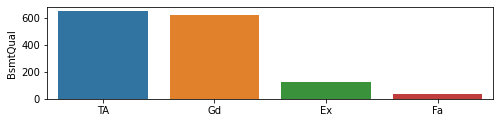

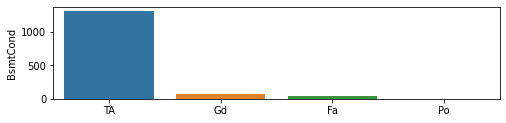

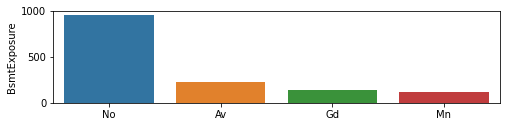

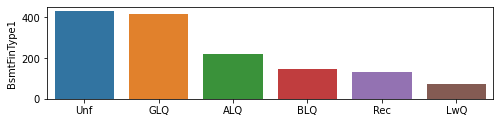

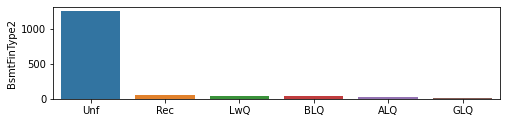

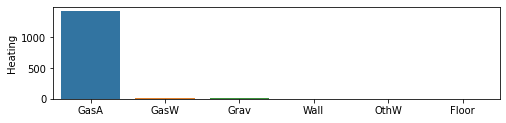

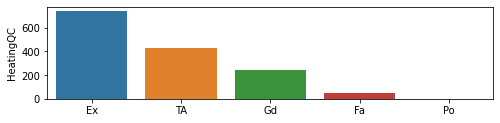

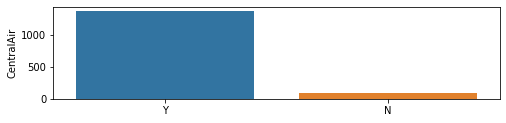

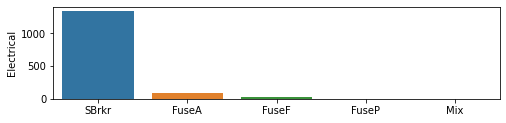

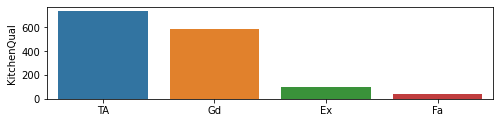

In [175]:
# figure(figsize=(8, 40), dpi=80)
plt.rcParams["figure.figsize"] = (8,20)
plt.subplot(10, 1, 1)
sns.barplot(x = raw_data_cat.BsmtQual.value_counts().index, y = raw_data_cat.BsmtQual.value_counts())
plt.show()

plt.subplot(10, 1, 2)
sns.barplot(x = raw_data_cat.BsmtCond.value_counts().index, y = raw_data_cat.BsmtCond.value_counts())
plt.show()

plt.subplot(10, 1, 3)
sns.barplot(x = raw_data_cat.BsmtExposure.value_counts().index, y = raw_data_cat.BsmtExposure.value_counts())
plt.show()

plt.subplot(10, 1, 4)
sns.barplot(x = raw_data_cat.BsmtFinType1.value_counts().index, y = raw_data_cat.BsmtFinType1.value_counts())
plt.show()

plt.subplot(10, 1, 5)
sns.barplot(x = raw_data_cat.BsmtFinType2.value_counts().index, y = raw_data_cat.BsmtFinType2.value_counts())
plt.show()

plt.subplot(10, 1, 6)
sns.barplot(x = raw_data_cat.Heating.value_counts().index, y = raw_data_cat.Heating.value_counts())
plt.show()

plt.subplot(10, 1, 7)
sns.barplot(x = raw_data_cat.HeatingQC.value_counts().index, y = raw_data_cat.HeatingQC.value_counts())
plt.show()

plt.subplot(10, 1, 8)
sns.barplot(x = raw_data_cat.CentralAir.value_counts().index, y = raw_data_cat.CentralAir.value_counts())
plt.show()

plt.subplot(10, 1, 9)
sns.barplot(x = raw_data_cat.Electrical.value_counts().index, y = raw_data_cat.Electrical.value_counts())
plt.show()

plt.subplot(10, 1, 10)
sns.barplot(x = raw_data_cat.KitchenQual.value_counts().index, y = raw_data_cat.KitchenQual.value_counts())
plt.show()

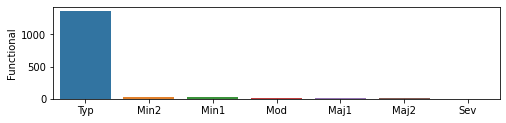

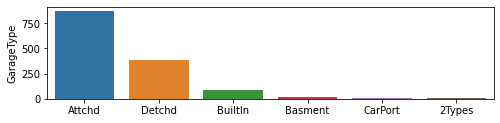

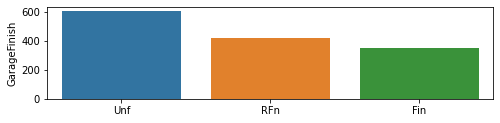

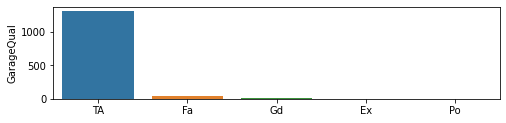

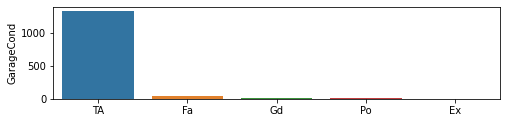

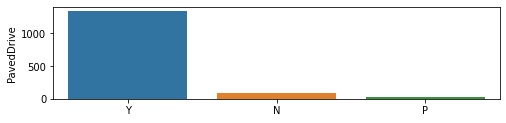

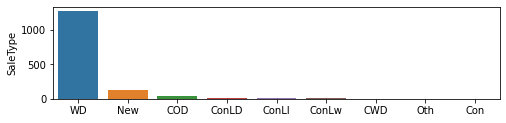

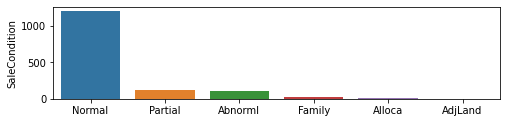

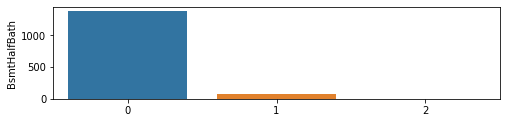

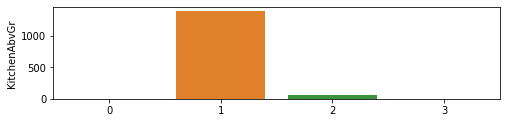

In [176]:
# figure(figsize=(8, 40), dpi=80)
plt.rcParams["figure.figsize"] = (8,20)
plt.subplot(10, 1, 1)
sns.barplot(x = raw_data_cat.Functional.value_counts().index, y = raw_data_cat.Functional.value_counts())
plt.show()

plt.subplot(10, 1, 2)
sns.barplot(x = raw_data_cat.GarageType.value_counts().index, y = raw_data_cat.GarageType.value_counts())
plt.show()

plt.subplot(10, 1, 3)
sns.barplot(x = raw_data_cat.GarageFinish.value_counts().index, y = raw_data_cat.GarageFinish.value_counts())
plt.show()

plt.subplot(10, 1, 4)
sns.barplot(x = raw_data_cat.GarageQual.value_counts().index, y = raw_data_cat.GarageQual.value_counts())
plt.show()

plt.subplot(10, 1, 5)
sns.barplot(x = raw_data_cat.GarageCond.value_counts().index, y = raw_data_cat.GarageCond.value_counts())
plt.show()

plt.subplot(10, 1, 6)
sns.barplot(x = raw_data_cat.PavedDrive.value_counts().index, y = raw_data_cat.PavedDrive.value_counts())
plt.show()

plt.subplot(10, 1, 7)
sns.barplot(x = raw_data_cat.SaleType.value_counts().index, y = raw_data_cat.SaleType.value_counts())
plt.show()

plt.subplot(10, 1, 8)
sns.barplot(x = raw_data_cat.SaleCondition.value_counts().index, y = raw_data_cat.SaleCondition.value_counts())
plt.show()

plt.subplot(10, 1, 9)
sns.barplot(x = raw_data_cat.BsmtHalfBath.value_counts().index, y = raw_data_cat.BsmtHalfBath.value_counts())
plt.show()

plt.subplot(10, 1, 10)
sns.barplot(x = raw_data_cat.KitchenAbvGr.value_counts().index, y = raw_data_cat.KitchenAbvGr.value_counts())
plt.show()

It is observed in some categorical features the distribution of the caterogry are not uniform and they are highly skewed. I am noting down those category and removing these feautres as they will make the model highly bias. The skewness is observed on the following features - 'MSZoning','Street','LandContour','Utilities', 'LandSlope', 'Condition1', 'Condition2','BldgType','RoofMatl','ExterCond','BsmtCond',
	  'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition','BsmtHalfBath','KitchenAbvGr'


In [177]:
skewed_cols = ['MSZoning','Street','LandContour','Utilities', 'LandSlope', 'Condition1', 'Condition2','BldgType','RoofMatl','ExterCond','BsmtCond',\
	  'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition','BsmtHalfBath','KitchenAbvGr']

raw_data_cat.drop(skewed_cols, axis =1, inplace=True)
raw_data_cat.shape

(1460, 23)

## Bivariate Analysis

### Numberic Vs Numberic

KeyboardInterrupt: ignored

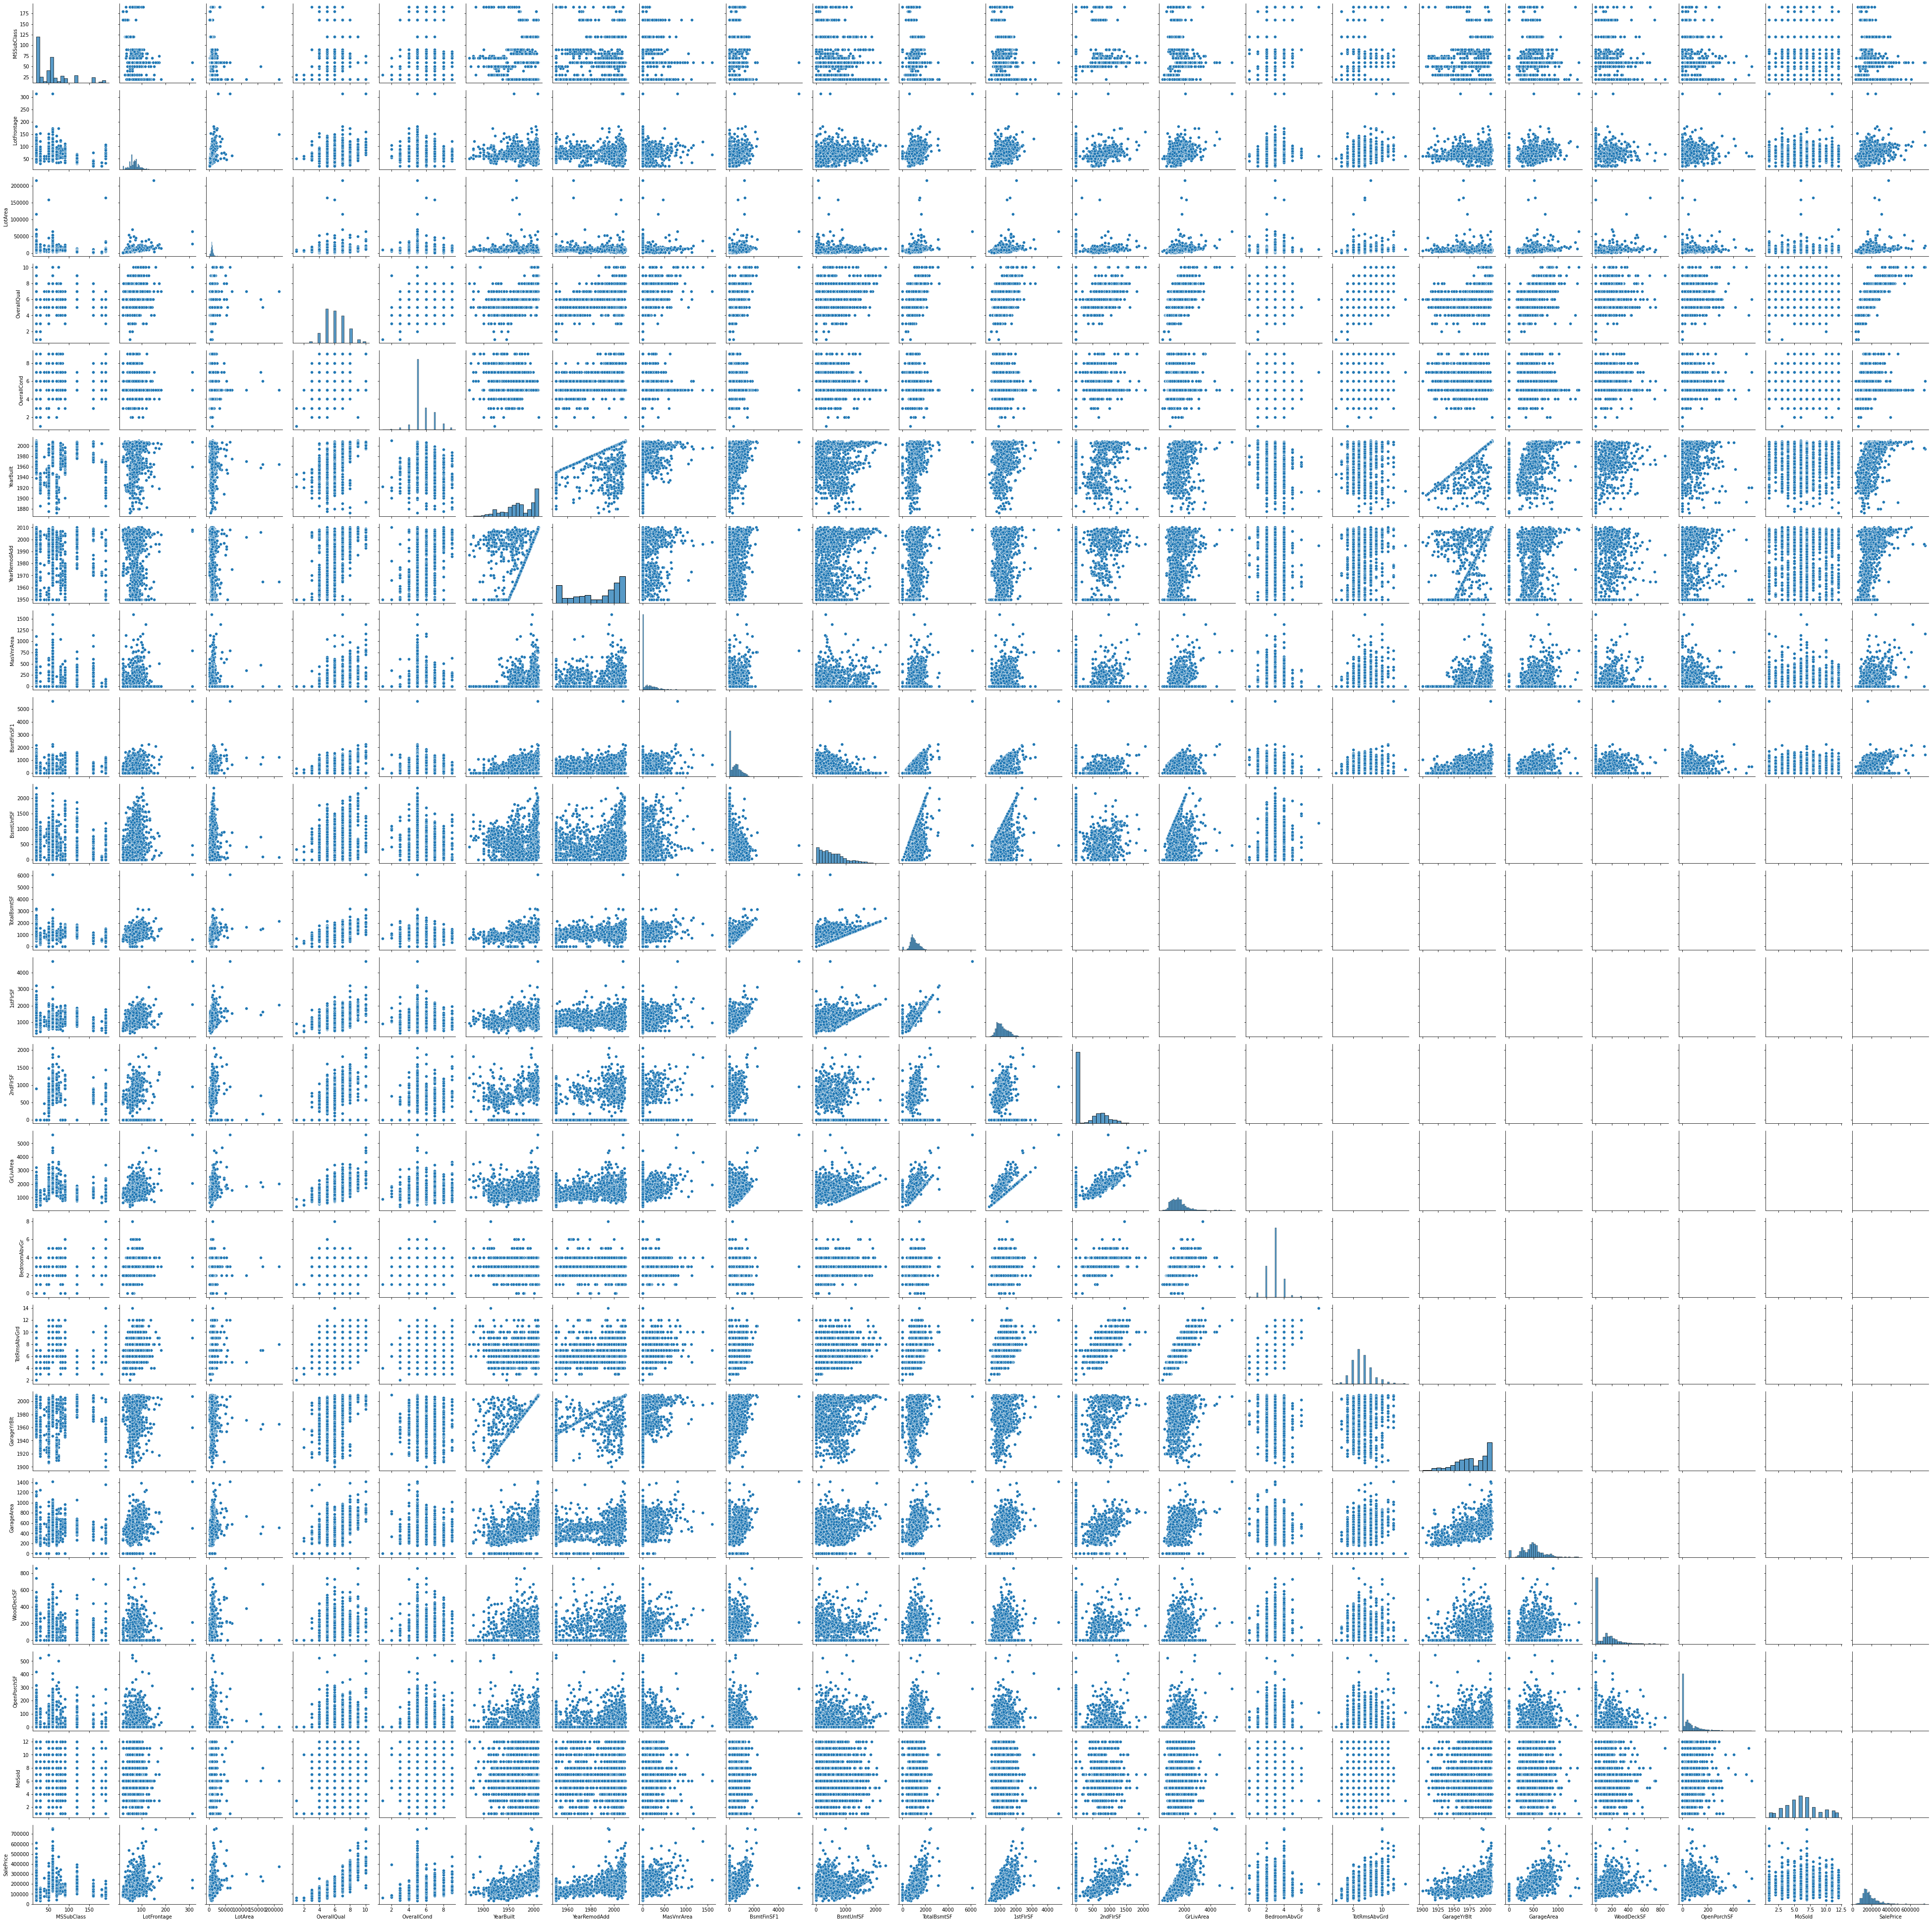

In [178]:
sns.pairplot(raw_data_numberic)
plt.show()

It is difficult to figure out something from the above diagram, Hence generating to corelation matrix

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(raw_data_numberic.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Key Obervation**
- GarageYrBlt seems to be highly co realted with YearBuilt. Hence I plan to keep only YearBuilt

In [190]:
raw_data_numberic.drop('GarageYrBlt', axis=1, inplace=True)

### Numberic Vs Categorical

In [191]:
raw_data = pd.concat([raw_data_cat, raw_data_numberic], axis=1)
raw_data.head()

LotShape LotConfig Neighborhood HouseStyle RoofStyle Exterior1st  \
0      Reg    Inside      CollgCr     2Story     Gable     VinylSd   
1      Reg       FR2      Veenker     1Story     Gable     MetalSd   
2      IR1    Inside      CollgCr     2Story     Gable     VinylSd   
3      IR1    Corner      Crawfor     2Story     Gable     Wd Sdng   
4      IR1       FR2      NoRidge     2Story     Gable     VinylSd   

  Exterior2nd MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd    BrkFace        Gd      PConc       Gd           No   
1     MetalSd       None        TA     CBlock       Gd           Gd   
2     VinylSd    BrkFace        Gd      PConc       Gd           Mn   
3     Wd Shng       None        TA     BrkTil       TA           No   
4     VinylSd    BrkFace        Gd      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish BsmtFullBath  \
0          GLQ        Ex          Gd     Attchd          RFn            1   
1          ALQ        Ex          TA     Attchd          RFn            0   
2          GLQ        Ex          Gd     Attchd          RFn            1   
3          ALQ        Gd          Gd     Detchd          Unf            1   
4          GLQ        Ex          Gd     Attchd          RFn            1   

  FullBath HalfBath Fireplaces GarageCars YrSold  MSSubClass  LotFrontage  \
0        2        1          0          2   2008          60         65.0   
1        2        0          1          2   2007          20         80.0   
2        2        1          1          2   2008          60         68.0   
3        1        0          1          3   2006          70         60.0   
4        2        1          1          3   2008          60         84.0   

   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0     8450            7            5       2003          2003       196.0   
1     9600            6            8       1976          1976         0.0   
2    11250            7            5       2001          2002       162.0   
3     9550            7            5       1915          1970         0.0   
4    14260            8            5       2000          2000       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BedroomAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  \
0             3             8         548           0           61       2   
1             3             6         460         298            0       5   
2             3             6         608           0           42       9   
3             3             7         642           0           35       2   
4             4             9         836         192           84      12   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [192]:
raw_data_cat.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageCars', 'YrSold'],
      dtype='object')

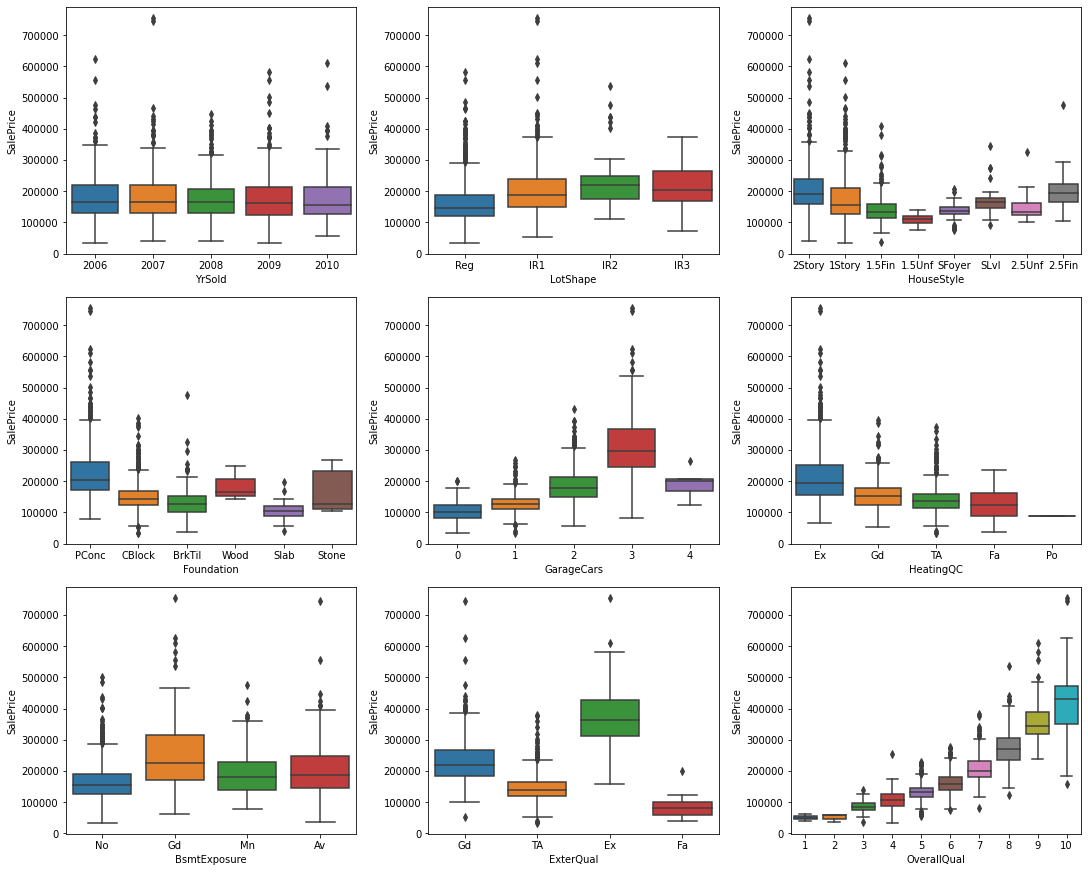

In [193]:
# understanding the categorical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12), constrained_layout=True)

sns.boxplot(y=raw_data.SalePrice, x=raw_data.YrSold, data=raw_data, ax=axes[0,0])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.LotShape, data=raw_data, ax=axes[0,1])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.HouseStyle, data=raw_data, ax=axes[0,2])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.Foundation, data=raw_data, ax=axes[1,0])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.GarageCars, data=raw_data, ax=axes[1,1])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.HeatingQC, data=raw_data, ax=axes[1,2])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.BsmtExposure, data=raw_data, ax=axes[2,0])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.ExterQual, data=raw_data, ax=axes[2,1])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.OverallQual, data=raw_data, ax=axes[2,2])

plt.show()

**Key Observations**

- House prices did not rise over the years as the median house price across the years remains the same.

- House prices for irregular plot/property seems to be higher than the property with regualar shape.

- 1st and 2nd story house have higher prices compared to any other category.

- Cinder block seems to be the preffered foundation and are the most expensive houses.

- houses with excellent heating quality seems to be the preferred choice and priced higher in the market.

- People prefer houses that have good basement exposure.

- Sale price seems to be highly proportional to the overall quality of the houses.

# 4: Data Prepartion <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [194]:
X = raw_data.drop('SalePrice', axis=1)
y = raw_data['SalePrice']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [196]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      978 non-null    object 
 1   LotConfig     978 non-null    object 
 2   Neighborhood  978 non-null    object 
 3   HouseStyle    978 non-null    object 
 4   RoofStyle     978 non-null    object 
 5   Exterior1st   978 non-null    object 
 6   Exterior2nd   978 non-null    object 
 7   MasVnrType    976 non-null    object 
 8   ExterQual     978 non-null    object 
 9   Foundation    978 non-null    object 
 10  BsmtQual      953 non-null    object 
 11  BsmtExposure  953 non-null    object 
 12  BsmtFinType1  953 non-null    object 
 13  HeatingQC     978 non-null    object 
 14  KitchenQual   978 non-null    object 
 15  GarageType    925 non-null    object 
 16  GarageFinish  925 non-null    object 
 17  BsmtFullBath  978 non-null    object 
 18  FullBath      978 non-null 

In [197]:
## seprating numberical and categorical columns to perfrom imputation
X_train_numberic = X_train.select_dtypes(include=['number'])
X_train_cat = X_train.select_dtypes(include=['object'])

In [198]:
print(X_train_cat.shape, X_train_numberic.shape)

(978, 23) (978, 20)


In [199]:
pd.set_option('display.max_column', None)
X_train_numberic.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
615           85         80.0     8800            6            7       1963   
613           20         70.0     8402            5            5       2007   
1303          20         73.0     8688            7            5       2005   
486           20         79.0    10289            5            7       1965   
561           20         77.0    10010            5            5       1974   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
615           1963       156.0         763        173          936      1054   
613           2007         0.0         206        914         1120      1120   
1303          2005       228.0           0       1616         1616      1616   
486           1965       168.0         836        237         1073      1073   
561           1975         0.0        1071        195         1389      1389   

      2ndFlrSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
615          0       1054             3             6         480         120   
613          0       1120             3             6           0           0   
1303         0       1616             3             7         834         208   
486          0       1073             3             6         515           0   
561          0       1389             2             6         418         240   

      OpenPorchSF  MoSold  
615             0       5  
613            30      12  
1303           59       4  
486             0       6  
561            38       4

## Imputing numberical columns

In [200]:
X_train_numberic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    978 non-null    int64  
 1   LotFrontage   795 non-null    float64
 2   LotArea       978 non-null    int64  
 3   OverallQual   978 non-null    int64  
 4   OverallCond   978 non-null    int64  
 5   YearBuilt     978 non-null    int64  
 6   YearRemodAdd  978 non-null    int64  
 7   MasVnrArea    976 non-null    float64
 8   BsmtFinSF1    978 non-null    int64  
 9   BsmtUnfSF     978 non-null    int64  
 10  TotalBsmtSF   978 non-null    int64  
 11  1stFlrSF      978 non-null    int64  
 12  2ndFlrSF      978 non-null    int64  
 13  GrLivArea     978 non-null    int64  
 14  BedroomAbvGr  978 non-null    int64  
 15  TotRmsAbvGrd  978 non-null    int64  
 16  GarageArea    978 non-null    int64  
 17  WoodDeckSF    978 non-null    int64  
 18  OpenPorchSF   978 non-null 

In [201]:
X_train_numberic.isnull().sum()

MSSubClass        0
LotFrontage     183
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        2
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BedroomAbvGr      0
TotRmsAbvGrd      0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
dtype: int64

In [202]:
X_train_numberic.describe().T

count          mean           std     min      25%     50%  \
MSSubClass    978.0     57.223926     42.873836    20.0    20.00    50.0   
LotFrontage   795.0     70.284277     25.532805    21.0    59.50    70.0   
LotArea       978.0  10743.494888  11556.193985  1300.0  7544.50  9579.5   
OverallQual   978.0      6.119632      1.370475     1.0     5.00     6.0   
OverallCond   978.0      5.567485      1.113813     1.0     5.00     5.0   
YearBuilt     978.0   1971.007157     30.752902  1872.0  1953.00  1972.0   
YearRemodAdd  978.0   1984.848671     20.760308  1950.0  1966.00  1994.0   
MasVnrArea    976.0    107.389344    175.043584     0.0     0.00     0.0   
BsmtFinSF1    978.0    448.719836    459.981913     0.0     0.00   395.5   
BsmtUnfSF     978.0    568.861963    444.189087     0.0   223.00   480.5   
TotalBsmtSF   978.0   1059.252556    447.693528     0.0   794.00   994.0   
1stFlrSF      978.0   1167.864008    389.356587   334.0   888.00  1096.5   
2ndFlrSF      978.0    352.068507    438.998906     0.0     0.00     0.0   
GrLivArea     978.0   1525.552147    523.397313   334.0  1144.25  1472.0   
BedroomAbvGr  978.0      2.882413      0.811558     0.0     2.00     3.0   
TotRmsAbvGrd  978.0      6.534765      1.618508     2.0     5.00     6.0   
GarageArea    978.0    477.200409    210.092714     0.0   352.00   484.0   
WoodDeckSF    978.0     97.285276    131.508239     0.0     0.00     0.0   
OpenPorchSF   978.0     49.847648     69.714613     0.0     0.00    27.0   
MoSold        978.0      6.377301      2.666325     1.0     5.00     6.0   

                   75%       max  
MSSubClass       70.00     190.0  
LotFrontage      80.00     313.0  
LotArea       11616.00  215245.0  
OverallQual       7.00      10.0  
OverallCond       6.00       9.0  
YearBuilt      2001.00    2010.0  
YearRemodAdd   2004.00    2010.0  
MasVnrArea      171.00    1378.0  
BsmtFinSF1      727.00    5644.0  
BsmtUnfSF       807.50    2336.0  
TotalBsmtSF    1296.75    6110.0  
1stFlrSF       1392.00    4692.0  
2ndFlrSF        728.00    1818.0  
GrLivArea      1787.75    5642.0  
BedroomAbvGr      3.00       8.0  
TotRmsAbvGrd      7.00      14.0  
GarageArea      576.00    1418.0  
WoodDeckSF      170.50     857.0  
OpenPorchSF      73.75     547.0  
MoSold            8.00      12.0

**Key Decision**

- For the column LotFrontage mean seems to be good way to substitue missing values as around 50% of the column values have values around 70


In [203]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_numberic_imputed = pd.DataFrame(imp_mean.fit_transform(X_train_numberic), columns = X_train_numberic.columns)

In [204]:
X_train_numberic_imputed.isnull().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BedroomAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
dtype: int64

In [109]:
X_train_numberic_imputed.head()

BsmtFullBath  FullBath  HalfBath  Fireplaces  GarageCars  YrSold  \
0           1.0       1.0       0.0         0.0         2.0  2010.0   
1           0.0       1.0       0.0         0.0         0.0  2007.0   
2           0.0       2.0       0.0         0.0         3.0  2006.0   
3           1.0       1.0       1.0         0.0         2.0  2007.0   
4           1.0       1.0       0.0         1.0         2.0  2006.0   

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        85.0         80.0   8800.0          6.0          7.0     1963.0   
1        20.0         70.0   8402.0          5.0          5.0     2007.0   
2        20.0         73.0   8688.0          7.0          5.0     2005.0   
3        20.0         79.0  10289.0          5.0          7.0     1965.0   
4        20.0         77.0  10010.0          5.0          5.0     1974.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0        1963.0       156.0       763.0      173.0        936.0    1054.0   
1        2007.0         0.0       206.0      914.0       1120.0    1120.0   
2        2005.0       228.0         0.0     1616.0       1616.0    1616.0   
3        1965.0       168.0       836.0      237.0       1073.0    1073.0   
4        1975.0         0.0      1071.0      195.0       1389.0    1389.0   

   2ndFlrSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0       0.0     1054.0           3.0           6.0       480.0       120.0   
1       0.0     1120.0           3.0           6.0         0.0         0.0   
2       0.0     1616.0           3.0           7.0       834.0       208.0   
3       0.0     1073.0           3.0           6.0       515.0         0.0   
4       0.0     1389.0           2.0           6.0       418.0       240.0   

   OpenPorchSF  MoSold  
0          0.0     5.0  
1         30.0    12.0  
2         59.0     4.0  
3          0.0     6.0  
4         38.0     4.0

## Scaling numberical columns

In [206]:
# scaling the data between 0 and 1
scaler = MinMaxScaler()
X_train_numberic_scaled = pd.DataFrame(scaler.fit_transform(X_train_numberic_imputed), columns = X_train_numberic_imputed.columns)
X_train_numberic_scaled.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.382353     0.202055  0.035056     0.555556         0.75   0.659420   
1    0.000000     0.167808  0.033195     0.444444         0.50   0.978261   
2    0.000000     0.178082  0.034532     0.666667         0.50   0.963768   
3    0.000000     0.198630  0.042015     0.444444         0.75   0.673913   
4    0.000000     0.191781  0.040711     0.444444         0.50   0.739130   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0      0.216667    0.113208    0.135188   0.074058     0.153191  0.165213   
1      0.950000    0.000000    0.036499   0.391267     0.183306  0.180358   
2      0.916667    0.165457    0.000000   0.691781     0.264484  0.294172   
3      0.250000    0.121916    0.148122   0.101455     0.175614  0.169573   
4      0.416667    0.000000    0.189759   0.083476     0.227332  0.242084   

   2ndFlrSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0       0.0   0.135644         0.375      0.333333    0.338505    0.140023   
1       0.0   0.148078         0.375      0.333333    0.000000    0.000000   
2       0.0   0.241522         0.375      0.416667    0.588152    0.242707   
3       0.0   0.139224         0.375      0.333333    0.363188    0.000000   
4       0.0   0.198757         0.250      0.333333    0.294781    0.280047   

   OpenPorchSF    MoSold  
0     0.000000  0.363636  
1     0.054845  1.000000  
2     0.107861  0.272727  
3     0.000000  0.454545  
4     0.069470  0.272727

## Imputing categorical values

In [207]:
X_train_cat.head()

LotShape LotConfig Neighborhood HouseStyle RoofStyle Exterior1st  \
615       Reg    Inside        NAmes     SFoyer     Gable     MetalSd   
613       Reg    Inside      Mitchel     1Story     Gable     VinylSd   
1303      Reg    Inside      Somerst     1Story     Gable     VinylSd   
486       Reg    Inside        NAmes     1Story       Hip     MetalSd   
561       Reg    Inside      Mitchel     1Story     Gable     HdBoard   

     Exterior2nd MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
615      MetalSd    BrkFace        TA      PConc       TA           Gd   
613      VinylSd       None        TA      PConc       Gd           No   
1303     VinylSd    BrkFace        Gd      PConc       Gd           Av   
486      MetalSd    BrkFace        TA     CBlock       TA           No   
561      HdBoard       None        TA     CBlock       Gd           Av   

     BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish BsmtFullBath  \
615           GLQ        Ex          Gd     Attchd          RFn            1   
613           ALQ        Ex          TA        NaN          NaN            0   
1303          Unf        Ex          Gd     Attchd          RFn            0   
486           ALQ        TA          TA     Attchd          RFn            1   
561           ALQ        Gd          TA     Attchd          RFn            1   

     FullBath HalfBath Fireplaces GarageCars YrSold  
615         1        0          0          2   2010  
613         1        0          0          0   2007  
1303        2        0          0          3   2006  
486         1        1          0          2   2007  
561         1        0          1          2   2006

In [208]:
X_train_cat.isnull().sum()

LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       2
ExterQual        0
Foundation       0
BsmtQual        25
BsmtExposure    25
BsmtFinType1    25
HeatingQC        0
KitchenQual      0
GarageType      53
GarageFinish    53
BsmtFullBath     0
FullBath         0
HalfBath         0
Fireplaces       0
GarageCars       0
YrSold           0
dtype: int64

In [209]:
X_train_cat = X_train_cat.where(pd.notnull(X_train_cat), None)

In [210]:
imp_median = SimpleImputer(missing_values=None, strategy='most_frequent')
X_train_cat = pd.DataFrame(imp_median.fit_transform(X_train_cat), columns = X_train_cat.columns)
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      978 non-null    object
 1   LotConfig     978 non-null    object
 2   Neighborhood  978 non-null    object
 3   HouseStyle    978 non-null    object
 4   RoofStyle     978 non-null    object
 5   Exterior1st   978 non-null    object
 6   Exterior2nd   978 non-null    object
 7   MasVnrType    978 non-null    object
 8   ExterQual     978 non-null    object
 9   Foundation    978 non-null    object
 10  BsmtQual      978 non-null    object
 11  BsmtExposure  978 non-null    object
 12  BsmtFinType1  978 non-null    object
 13  HeatingQC     978 non-null    object
 14  KitchenQual   978 non-null    object
 15  GarageType    978 non-null    object
 16  GarageFinish  978 non-null    object
 17  BsmtFullBath  978 non-null    object
 18  FullBath      978 non-null    object
 19  HalfBath

In [211]:
X_train_cat.head()

LotShape LotConfig Neighborhood HouseStyle RoofStyle Exterior1st  \
0      Reg    Inside        NAmes     SFoyer     Gable     MetalSd   
1      Reg    Inside      Mitchel     1Story     Gable     VinylSd   
2      Reg    Inside      Somerst     1Story     Gable     VinylSd   
3      Reg    Inside        NAmes     1Story       Hip     MetalSd   
4      Reg    Inside      Mitchel     1Story     Gable     HdBoard   

  Exterior2nd MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0     MetalSd    BrkFace        TA      PConc       TA           Gd   
1     VinylSd       None        TA      PConc       Gd           No   
2     VinylSd    BrkFace        Gd      PConc       Gd           Av   
3     MetalSd    BrkFace        TA     CBlock       TA           No   
4     HdBoard       None        TA     CBlock       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual GarageType GarageFinish BsmtFullBath  \
0          GLQ        Ex          Gd     Attchd          RFn            1   
1          ALQ        Ex          TA     Attchd          Unf            0   
2          Unf        Ex          Gd     Attchd          RFn            0   
3          ALQ        TA          TA     Attchd          RFn            1   
4          ALQ        Gd          TA     Attchd          RFn            1   

  FullBath HalfBath Fireplaces GarageCars YrSold  
0        1        0          0          2   2010  
1        1        0          0          0   2007  
2        2        0          0          3   2006  
3        1        1          0          2   2007  
4        1        0          1          2   2006

In [212]:
X_train_cat.shape

(978, 23)

In [213]:
X_train_cat.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageCars', 'YrSold'],
      dtype='object')

In [214]:
## columns to be one hot encoded
dummeies_cat_cols = ['LotConfig','HouseStyle','RoofStyle','MasVnrType','Foundation',\
                     'GarageType','BsmtFullBath','FullBath','HalfBath','Fireplaces','GarageCars']

## column to be encoded orinally
ordinal_cat_cols = ['LotShape', 'ExterQual', 'BsmtQual',\
                    'BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual',\
                    'GarageFinish','YrSold']

## I choose to remove these column as they add sprasity and make the model complex
high_cardinal_cols = ['Neighborhood',  'Exterior1st',\
                      'Exterior2nd']

In [215]:
print(len(dummeies_cat_cols), len(ordinal_cat_cols), len(high_cardinal_cols))

11 9 3


In [216]:
## dropping columns of high cardinality
X_train_cat = X_train_cat.drop(labels=high_cardinal_cols, axis=1)
X_train_cat.shape

(978, 20)

## Ordinal encoding

In [217]:
## performing ordinal and one hot encoding
enc = OrdinalEncoder()
X_train_cat_ordinal = pd.DataFrame(enc.fit_transform(X_train_cat[ordinal_cat_cols]), columns = X_train_cat[ordinal_cat_cols].columns)
X_train_cat_ordinal.head()

LotShape  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  \
0       3.0        3.0       3.0           1.0           2.0        0.0   
1       3.0        3.0       2.0           3.0           0.0        0.0   
2       3.0        2.0       2.0           0.0           5.0        0.0   
3       3.0        3.0       3.0           3.0           0.0        4.0   
4       3.0        3.0       2.0           0.0           0.0        2.0   

   KitchenQual  GarageFinish  YrSold  
0          2.0           1.0     4.0  
1          3.0           2.0     1.0  
2          2.0           1.0     0.0  
3          3.0           1.0     1.0  
4          3.0           1.0     0.0

## One hot encoding

In [218]:
# Convert into dummies
X_train_dummies = pd.get_dummies(X_train_cat[dummeies_cat_cols], drop_first=True)
X_train_dummies.head()

LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              0              0                 1   
2                  0              0              0                 1   
3                  0              0              0                 1   
4                  0              0              0                 1   

   HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  \
0                  0                  0                  0                  0   
1                  0                  1                  0                  0   
2                  0                  1                  0                  0   
3                  0                  1                  0                  0   
4                  0                  1                  0                  0   

   HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  RoofStyle_Gable  \
0                  0                  1                0                1   
1                  0                  0                0                1   
2                  0                  0                0                1   
3                  0                  0                0                0   
4                  0                  0                0                1   

   RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  \
0                  0              0                  0               0   
1                  0              0                  0               0   
2                  0              0                  0               0   
3                  0              1                  0               0   
4                  0              0                  0               0   

   MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  Foundation_CBlock  \
0                   1                0                 0                  0   
1                   0                1                 0                  0   
2                   1                0                 0                  0   
3                   1                0                 0                  1   
4                   0                1                 0                  1   

   Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
0                 1                0                 0                0   
1                 1                0                 0                0   
2                 1                0                 0                0   
3                 0                0                 0                0   
4                 0                0                 0                0   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  1                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  BsmtFullBath_1  BsmtFullBath_2  \
0                   0                  0               1               0   
1                   0                  0               0               0   
2                   0                  0               0               0   
3                   0                  0               1               0   
4                   0                  0               1               0   

   BsmtFullBath_3  FullBath_1  FullBath_2  FullBath_3  HalfBath_1  HalfBath_2  \
0               0           1           0           0           0           0   
1               0           1           0           0           0           0   
2               0           0           1           0           0           0   
3               0           1           0           0           1           0   
4 

In [219]:
X_train_dummies.shape

(978, 44)

##Mergeing the dataframes

In [220]:
# Merging the dataframes
X_train = pd.concat([X_train_numberic_scaled, X_train_dummies,X_train_cat_ordinal], axis=1)
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.382353     0.202055  0.035056     0.555556         0.75   0.659420   
1    0.000000     0.167808  0.033195     0.444444         0.50   0.978261   
2    0.000000     0.178082  0.034532     0.666667         0.50   0.963768   
3    0.000000     0.198630  0.042015     0.444444         0.75   0.673913   
4    0.000000     0.191781  0.040711     0.444444         0.50   0.739130   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0      0.216667    0.113208    0.135188   0.074058     0.153191  0.165213   
1      0.950000    0.000000    0.036499   0.391267     0.183306  0.180358   
2      0.916667    0.165457    0.000000   0.691781     0.264484  0.294172   
3      0.250000    0.121916    0.148122   0.101455     0.175614  0.169573   
4      0.416667    0.000000    0.189759   0.083476     0.227332  0.242084   

   2ndFlrSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  GarageArea  WoodDeckSF  \
0       0.0   0.135644         0.375      0.333333    0.338505    0.140023   
1       0.0   0.148078         0.375      0.333333    0.000000    0.000000   
2       0.0   0.241522         0.375      0.416667    0.588152    0.242707   
3       0.0   0.139224         0.375      0.333333    0.363188    0.000000   
4       0.0   0.198757         0.250      0.333333    0.294781    0.280047   

   OpenPorchSF    MoSold  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0     0.000000  0.363636                  0              0              0   
1     0.054845  1.000000                  0              0              0   
2     0.107861  0.272727                  0              0              0   
3     0.000000  0.454545                  0              0              0   
4     0.069470  0.272727                  0              0              0   

   LotConfig_Inside  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  \
0                 1                  0                  0                  0   
1                 1                  0                  1                  0   
2                 1                  0                  1                  0   
3                 1                  0                  1                  0   
4                 1                  0                  1                  0   

   HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  \
0                  0                  0                  1                0   
1                  0                  0                  0                0   
2                  0                  0                  0                0   
3                  0                  0                  0                0   
4                  0                  0                  0                0   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                1                  0              0                  0   
2                1                  0              0                  0   
3                0                  0              1                  0   
4                1                  0              0                  0   

   RoofStyle_Shed  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  \
0               0                   1                0                 0   
1               0                   0                1                 0   
2               0                   1                0                 0   
3               0                   1                0                 0   
4               0                   0                1                 0   

   Foundation_CBlock  Foundation_PConc  Foundation_Slab  Foundation_Stone  \
0                  0                 1                0                 0   
1                  0                 1                0                 0   
2                  0                 1            

In [221]:
X_train.shape

(978, 73)

# Perparing the test data

In [ ]:
X_test.info()

In [ ]:
## seprating numberical and categorical columns
X_test_numberic = X_test.select_dtypes(include=['number'])
X_test_cat = X_test.select_dtypes(include=['object'])

## Observing few column can be classifed as catergorical instead on numberical
cat_cols = ['YearBuilt', 'GarageYrBlt', 'YrSold']
X_test_numberic[cat_cols] = X_test_numberic[cat_cols].astype(object)
X_test_cat = pd.concat([X_test_cat.sort_index(), X_test_numberic[cat_cols].sort_index()],  axis=1)
X_test_numberic = X_test_numberic.drop(cat_cols, axis=1)
# print(X_test_cat.shape, X_test_numberic.shape)

## Imputing numberical cols
X_test_numberic = X_test_numberic.drop(labels=['LotFrontage','MasVnrArea'], axis=1)
# X_test_numberic.head()

# scaling the data between 0 and 1
X_test_numberic_scaled = pd.DataFrame(scaler.transform(X_test_numberic), columns = X_test_numberic.columns)

X_test_cat = X_test_cat.where(pd.notnull(X_test_cat), None)
imp_median = SimpleImputer(missing_values=None, strategy='most_frequent')
X_test_cat = pd.DataFrame(imp_median.fit_transform(X_test_cat), columns = X_test_cat.columns)
# X_test_cat.info()

X_test_cat = X_test_cat.drop(labels=high_cardinal_cols, axis=1)
# X_test_cat.shape

## performing ordinal and one hot encoding
enc = OrdinalEncoder()
X_test_cat_ordinal = pd.DataFrame(enc.fit_transform(X_test_cat[ordinal_cat_cols]), columns = X_test_cat[ordinal_cat_cols].columns)
# X_test_cat_ordinal.head()

# Convert into dummies
X_test_dummies = pd.get_dummies(X_test_cat[dummeies_cat_cols], drop_first=True)
# X_test_dummies.head()

# Merging the dataframes
X_test = pd.concat([X_test_numberic_scaled, X_test_dummies,X_test_cat_ordinal], axis=1)
X_test.head()

# Implementing RFE

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

#===========================================================================
# perform a scikit-learn Recursive Feature Elimination (RFE)
#===========================================================================
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)


#===========================================================================
# now print out the features in order of ranking
#===========================================================================
feature_list = []
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)
    feature_list.append(y)

top_15_numberic_features = X_train[feature_list[:15]]

top_15_numberic_features.head()

In [39]:
top_15_numberic_features.shape

(978, 15)

In [44]:
top_15_numberic_features.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea',
       '1stFlrSF', 'LotArea', 'YearRemodAdd', 'GarageCars', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'TotRmsAbvGrd', 'BsmtUnfSF', 'ScreenPorch'],
      dtype='object')

# Linear Regression

In [78]:
reg = LinearRegression().fit(top_15_numberic_features, y_train)

In [79]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [80]:
print("Number of non-zero Coefficients {}".format(np.sum(reg.coef_!=0)))
y_pred_train = reg.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = reg.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1288175732.241027
MAE Score Test 22850.28747045819
R2 Score Test 0.7777798336681641 

MSE Test 1551216920.675647
MAE Score Test 24167.838521701542
R2 Score Test 0.7887025981202558 



(1551216920.675647, 24167.838521701542, 0.7887025981202558)

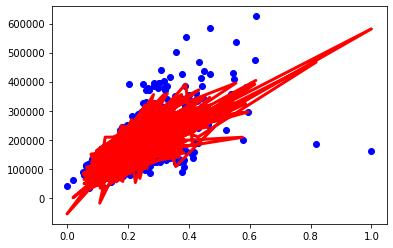

In [84]:
plt.scatter(top_15_numberic_features['GrLivArea'], y_train, color='blue')
plt.plot(top_15_numberic_features['GrLivArea'], y_pred_train, color='red', linewidth=3)
plt.show()

In [52]:
lasso1 = Lasso()
lasso1.fit(top_15_numberic_features, y_train)

ridge1 = Ridge()
ridge1.fit(top_15_numberic_features, y_train)

Ridge()

In [57]:
print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso1.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1288178446.4399586
MAE Score Test 22850.430819454796
R2 Score Test 0.777779365448089 

MSE Test 1551752736.1817923
MAE Score Test 24171.953123953674
R2 Score Test 0.7886296125675414 



(1551752736.1817923, 24171.953123953674, 0.7886296125675414)

In [58]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = ridge1.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = ridge1.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1293981732.9386432
MAE Score Test 22851.51493001996
R2 Score Test 0.7767782541410428 

MSE Test 1574138929.539494
MAE Score Test 24091.780275357563
R2 Score Test 0.7855803004878358 



(1574138929.539494, 24091.780275357563, 0.7855803004878358)

In [ ]:
# lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# for i in lambdas:
#   ridgereg=Ridge(aplha=i)
#   ridgereg.fit(X_poly,y)

In [66]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
Ridge = RidgeCV(alphas=arange(0, 1, 0.01),  cv=cv, scoring='neg_mean_absolute_error')

#fit model
Ridge.fit(top_15_numberic_features, y_train)

#display lambda that produced the lowest test MSE
print(Ridge.alpha_)

0.99


In [ ]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
Lasso = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
Lasso.fit(top_15_numberic_features, y_train)

#display lambda that produced the lowest test MSE
print(Lasso.alpha_)


In [68]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = Ridge.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = Ridge.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1293888495.6316018
MAE Score Test 22850.826164748472
R2 Score Test 0.7767943382896263 

MSE Test 1573856383.5419376
MAE Score Test 24091.182077301997
R2 Score Test 0.7856187871974633 



(1573856383.5419376, 24091.182077301997, 0.7856187871974633)

In [69]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge1.coef_!=0)))
y_pred_train = Lasso.predict(top_15_numberic_features)
get_error_stats(y_train,y_pred_train)

y_pred_test = Lasso.predict(X_test[top_15_numberic_features.columns])
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 15
MSE Test 1288178388.3260803
MAE Score Test 22850.429150734806
R2 Score Test 0.7777793754731774 

MSE Test 1551747192.3130205
MAE Score Test 24171.909857135164
R2 Score Test 0.7886303677198687 



(1551747192.3130205, 24171.909857135164, 0.7886303677198687)

In [77]:
alphas = np.array([0.01, 
                    0.001, 
                    0.0001, 
                    0.0002, 
                    0.0003, 
                    0.0004, 
                    0.0005])
 
# Create a parameter grid dictionary with hyperparameter values
paramgrid = {'alpha': alphas}
 
# Instantiate a Lasso regularized model 
model = Lasso()
 
# Instantiate the GridSearchCV method
grid = GridSearchCV(estimator = model, param_grid = paramgrid)
 
# Fit the data into model using GridSearchCV
grid.fit(top_15_numberic_features, y_train)
 
# Get the best score of Lasso regression model and print it
print('\n')
print('*' * 100)
print("The best score of the model using Lasso regresssion and given alpha values is: {0}".format(grid.best_score_))
print('*' * 100)
print('\n')
 
# Get the best score of hyperparameter alpha for Lasso regression and print it
print('*' * 100)
print("The best hyperparameter value for alpha for Lasso regression is: {0}".format(grid.best_estimator_.alpha))
print('*' * 100)
print('\n')



****************************************************************************************************
The best score of the model using Lasso regresssion and given alpha values is: 0.7464972677744942
****************************************************************************************************


****************************************************************************************************
The best hyperparameter value for alpha for Lasso regression is: 0.01
****************************************************************************************************


